In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv("trainset.csv")

In [3]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [4]:
trainset = dataset_train.iloc[:,1:2].values

In [5]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [7]:
training_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [8]:
x_train = []
y_train = []

In [9]:
for i in range(60,1259):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train.shape

(1199, 60)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [14]:
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))

In [19]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [20]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 87ms/step - loss: 0.0265
Epoch 2/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0050
Epoch 3/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0040
Epoch 4/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0036
Epoch 5/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0040
Epoch 6/100
38/38 [==============================] - 3s 84ms/step - loss: 0.0035
Epoch 7/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0035
Epoch 8/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0033
Epoch 9/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0031
Epoch 10/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0034
Epoch 11/100
38/38 [==============================] - 3s 81ms/step - loss: 0.0031
Epoch 12/100
38/38 [==============================] - 3s 80ms/step - loss: 0.0032
Epoch 13/100
38/38 [====

In [21]:
dataset_test =pd.read_csv("testset.csv")

In [22]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [23]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0       357.385559
1       360.122742
2       362.313507
3       365.348755
4       365.393463
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 1384, dtype: float64

In [24]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([ 955.48999 ,  966.700012,  980.      ,  980.      ,  973.719971,
        987.450012,  992.      ,  992.099976,  990.289978,  991.77002 ,
        986.      ,  989.440002,  989.52002 ,  970.      ,  968.369995,
        980.      , 1009.190002, 1014.      , 1015.219971, 1017.210022,
       1021.76001 , 1022.109985, 1028.98999 , 1027.27002 , 1030.52002 ,
       1033.98999 , 1026.459961, 1023.419983, 1022.590027, 1019.210022,
       1022.52002 , 1034.01001 , 1020.26001 , 1023.309998, 1035.      ,
       1035.869995, 1040.      , 1055.089966, 1042.680054, 1022.369995,
       1015.799988, 1012.659973,  995.940002, 1001.5     , 1020.429993,
       1037.48999 , 1035.5     , 1039.630005, 1046.119995, 1045.      ,
       1054.609985, 1066.079956, 1075.199951, 1071.780029, 1064.949951,
       1061.109985, 1058.069946, 1057.390015, 1051.599976, 1046.719971,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [25]:
inputs = inputs.reshape(-1,1)

In [26]:
inputs

array([[ 955.48999 ],
       [ 966.700012],
       [ 980.      ],
       [ 980.      ],
       [ 973.719971],
       [ 987.450012],
       [ 992.      ],
       [ 992.099976],
       [ 990.289978],
       [ 991.77002 ],
       [ 986.      ],
       [ 989.440002],
       [ 989.52002 ],
       [ 970.      ],
       [ 968.369995],
       [ 980.      ],
       [1009.190002],
       [1014.      ],
       [1015.219971],
       [1017.210022],
       [1021.76001 ],
       [1022.109985],
       [1028.98999 ],
       [1027.27002 ],
       [1030.52002 ],
       [1033.98999 ],
       [1026.459961],
       [1023.419983],
       [1022.590027],
       [1019.210022],
       [1022.52002 ],
       [1034.01001 ],
       [1020.26001 ],
       [1023.309998],
       [1035.      ],
       [1035.869995],
       [1040.      ],
       [1055.089966],
       [1042.680054],
       [1022.369995],
       [1015.799988],
       [1012.659973],
       [ 995.940002],
       [1001.5     ],
       [1020.429993],
       [10

In [27]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [28]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [29]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [30]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [31]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 2s 29ms/step


In [32]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1033.5573 ],
       [1032.4305 ],
       [1034.9204 ],
       [1043.37   ],
       [1054.2573 ],
       [1064.1259 ],
       [1071.4363 ],
       [1073.2683 ],
       [1072.9497 ],
       [1071.9374 ],
       [1076.532  ],
       [1083.444  ],
       [1090.185  ],
       [1094.9641 ],
       [1098.4196 ],
       [1104.4937 ],
       [1114.3118 ],
       [1123.038  ],
       [1128.6495 ],
       [1131.4272 ],
       [1131.0756 ],
       [1130.0542 ],
       [1128.5272 ],
       [1120.8833 ],
       [1106.1971 ],
       [1081.4147 ],
       [1065.2285 ],
       [1057.6299 ],
       [1049.7114 ],
       [1045.7986 ],
       [1044.9845 ],
       [1045.6476 ],
       [1050.7715 ],
       [1058.5292 ],
       [1064.9984 ],
       [1070.5723 ],
       [1075.8273 ],
       [1079.0771 ],
       [1082.8076 ],
       [1088.9141 ],
       [1092.3077 ],
       [1090.243  ],
       [1076.7555 ],
       [1063.3926 ],
       [1060.2432 ],
       [1064.0153 ],
       [1073.8744 ],
       [1087.

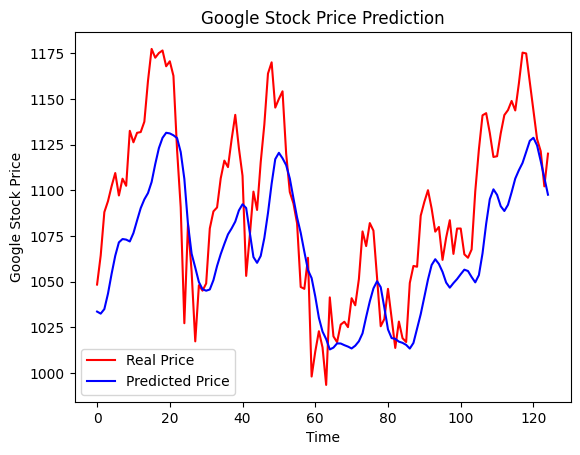

In [33]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()